In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [6]:
df=pd.read_csv("Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Check for missing values
print(df.isnull().sum())




CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:

# Analyze the distributions of different variables
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [10]:
# Explore relationships between different variables
print(df.corr())

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [11]:
# Convert categorical variable 'Gender' into numerical using Label Encoding
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [13]:
class GMM:
    def __init__(self, n_components, max_iter = 100, comp_names=None):
        self.n_componets = n_components
        self.max_iter = max_iter
        if comp_names == None:
            self.comp_names = [f"comp{index}" for index in range(self.n_componets)]
        else:
            self.comp_names = comp_names
        # pi list contains the fraction of the dataset for every cluster
        self.pi = [1/self.n_componets for comp in range(self.n_componets)]

In [14]:


# Importing the libraries
import numpy as np
import pandas as pd
class GMM:
    '''
        This class is the implementation of the Gaussian Mixture Models 
        inspired by sci-kit learn implementation.
    '''
    def __init__(self, n_components, max_iter = 100, comp_names=None):
        '''
            This functions initializes the model by seting the following paramenters:
                :param n_components: int
                    The number of clusters in which the algorithm must split
                    the data set
                :param max_iter: int, default = 100
                    The number of iteration that the algorithm will go throw to find the clusters
                :param comp_names: list of strings, default=None
                    In case it is setted as a list of string it will use to
                    name the clusters
        '''
        self.n_componets = n_components
        self.max_iter = max_iter
        if comp_names == None:
            self.comp_names = [f"comp{index}" for index in range(self.n_componets)]
        else:
            self.comp_names = comp_names
        # pi list contains the fraction of the dataset for every cluster
        self.pi = [1/self.n_componets for comp in range(self.n_componets)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        '''
            This function implements the multivariat normal derivation formula,
            the normal distribution for vectors it requires the following parameters
                :param X: 1-d numpy array
                    The row-vector for which we want to calculate the distribution
                :param mean_vector: 1-d numpy array
                    The row-vector that contains the means for each column
                :param covariance_matrix: 2-d numpy array (matrix)
                    The 2-d matrix that contain the covariances for the features
        '''
        return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T,
                 np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

    def fit(self, X):
        '''
            The function for training the model
                :param X: 2-d numpy array
                    The data must be passed to the algorithm as 2-d array, 
                    where columns are the features and the rows are the samples
        '''
        # Spliting the data in n_componets sub-sets
        new_X = np.array_split(X, self.n_componets)
        # Initial computation of the mean-vector and covarience matrix
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) for x in new_X]
        # Deleting the new_X matrix because we will not need it anymore
        del new_X
        for iteration in range(self.max_iter):
            ''' --------------------------   E - STEP   -------------------------- '''
            # Initiating the r matrix, evrey row contains the probabilities
            # for every cluster for this row
            self.r = np.zeros((len(X), self.n_componets))
            # Calculating the r matrix
            for n in range(len(X)):
                for k in range(self.n_componets):
                    self.r[n][k] = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] /= sum([self.pi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)])
            # Calculating the N
            N = np.sum(self.r, axis=0)
            ''' --------------------------   M - STEP   -------------------------- '''
            # Initializing the mean vector as a zero vector
            self.mean_vector = np.zeros((self.n_componets, len(X[0])))
            # Updating the mean vector
            for k in range(self.n_componets):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
            self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_componets)]
            # Initiating the list of the covariance matrixes
            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
            # Updating the covariance matrices
            for k in range(self.n_componets):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
            self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_componets)]
            # Updating the pi list
            self.pi = [N[k]/len(X) for k in range(self.n_componets)]
    def predict(self, X):
        '''
            The predicting function
                :param X: 2-d array numpy array
                    The data on which we must predict the clusters
        '''
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                           for k in range(self.n_componets)])
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster

In [23]:
X = df.iloc[:, [ 2,3, 4]].values

# print(X)

gmm = GMM(n_components=3, max_iter=100, comp_names=["Cluster 1", "Cluster 2", "Cluster 3"])

# Fit the GMM model to your data
result=gmm.fit(X)



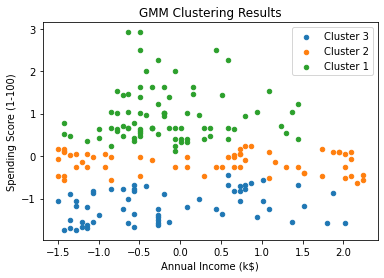

In [24]:

# Predict the clusters for each data point
clusters = gmm.predict(X)

# Define colors for each cluster
colors = {c: plt.cm.tab10(i) for i, c in enumerate(set(clusters))}

# Plot the points with different colors based on their cluster
fig, ax = plt.subplots()
for key, group in zip(set(clusters), pd.DataFrame(X).groupby(clusters)):
    group[1].plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering Results')

plt.show()

In [17]:

# Define a list of candidate numbers of components
n_components = [2, 3, 4, 5,6,7,8,9]

# Fit the GMM model with each number of components and compute the silhouette score
for n in n_components:
    gmm = GMM(n_components=n)
    gmm.fit(X)
    clusters = gmm.predict(X)
    score = silhouette_score(X, clusters)
    print(f"Number of components: {n}, Silhouette score: {score}")

Number of components: 2, Silhouette score: 0.24435730693243995
Number of components: 3, Silhouette score: 0.14189389460934337
Number of components: 4, Silhouette score: 0.11204698366364156
Number of components: 5, Silhouette score: 0.06750948487008036
Number of components: 6, Silhouette score: 0.029438559216474123
Number of components: 7, Silhouette score: -0.005369206245666121
Number of components: 8, Silhouette score: -0.027281600677826368
Number of components: 9, Silhouette score: -0.030815007354342144


In [25]:
gmm = GMM(n_components=2)
gmm.fit(X)
clusters = gmm.predict(X)

Cluster sizes:
Cluster
comp0     98
comp1    102
dtype: int64
Cluster means:
         CustomerID    Gender       Age  Annual Income (k$)  \
Cluster                                                       
comp0     53.673469  0.418367  0.405482           -0.766458   
comp1    145.490196  0.460784 -0.389581            0.736401   

         Spending Score (1-100)  
Cluster                          
comp0                 -0.034702  
comp1                  0.033341  


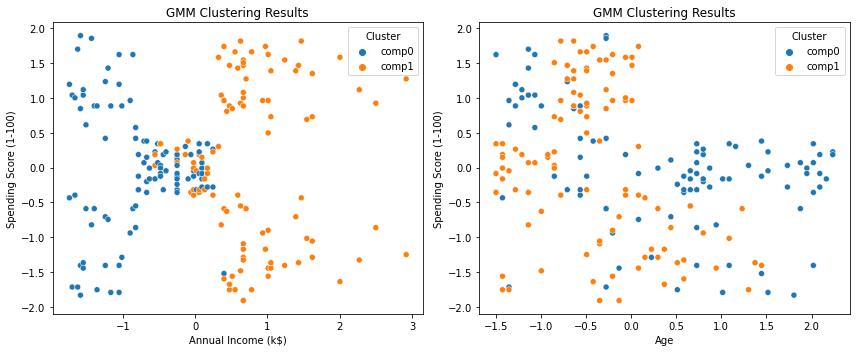

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the clusters for each data point
clusters = gmm.predict(X)

# Add the cluster assignments to the original dataframe
df['Cluster'] = clusters

# Determine the size of each cluster
cluster_sizes = df.groupby('Cluster').size()
print("Cluster sizes:")
print(cluster_sizes)

# Examine the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print("Cluster means:")
print(cluster_means)

# Visualize the clusters using a scatter plot
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for 'Annual Income' vs. 'Spending Score'
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, ax=axes[0])
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('GMM Clustering Results')

# Scatter plot for 'Age' vs. 'Spending Score'
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('GMM Clustering Results')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

